<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml13_svm_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap  # contour plot

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC  # SVM을 이용한 분류(Classification)
from sklearn.svm import LinearSVR, SVR  # SVM을 이용한 회귀(Regression)

# Linear SVM Classification(선형 SVM 분류)

In [ ]:
# iris 데이터 셋을 로드
iris = datasets.load_iris()

In [ ]:
# iris에서 특성 2개(petal length, petal width) 선택, 클래스 2개(setosa, versicolor) 선택
features = iris['data']  # (150, 4) shape의 2d array
target = iris['target']  # (150,) shape의 1d array

In [ ]:
X = features[:100, -2:]
y = target[:100]

In [ ]:
X.shape  # (100, 2)

(100, 2)

In [ ]:
y.shape  # (100,)

(100,)

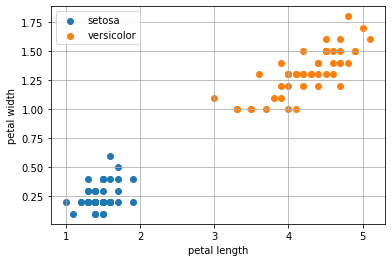

In [ ]:
# 샘플들 시각화
plt.scatter(X[:50, 0], X[:50, 1], label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], label='versicolor')
plt.grid()
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
# 특성들을 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

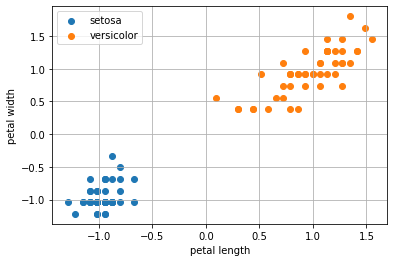

In [ ]:
# 스케일링된 특성들을 시각화
plt.scatter(X_scaled[:50, 0], X_scaled[:50, 1], label='setosa')
plt.scatter(X_scaled[50:, 0], X_scaled[50:, 1], label='versicolor')
plt.grid()
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
# 선형 SVM 분류기 생성
lin_svc = LinearSVC(random_state=0)

In [ ]:
# 모델 훈련
lin_svc.fit(X_scaled, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

SVM 분류기를 훈련(데이터에 맞춤)시킨다는 것은 클래스 사이의 마진(margin)이 최대가 되는 초평면(hyperplane)을 찾는다는 의미. 초평면의 방정식을 찾는다는 의미.

$$
w_0 + w_1 x_1 + w_2 x_2 = 0
$$

위 방정식에서 계수들($ w_0, w_1, w_2 $)을 찾는다는 의미.

In [ ]:
lin_svc.intercept_

array([0.26072943])

In [ ]:
w0 = lin_svc.intercept_[0]

In [ ]:
lin_svc.coef_

array([[0.90013736, 0.83424108]])

In [ ]:
w1, w2 = lin_svc.coef_[0]

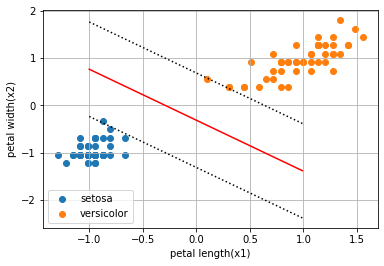

In [ ]:
# 데이터와 SVM이 찾은 hyperplane(직선)을 시각화
plt.scatter(X_scaled[:50, 0], X_scaled[:50, 1], label='setosa')
plt.scatter(X_scaled[50:, 0], X_scaled[50:, 1], label='versicolor')

# SVM 머신이 찾은 hyperplane
xs = np.arange(-1.0, 1.0, 0.01)
ys = -(1/w2) * (w0 + w1 * xs)
plt.plot(xs, ys, 'r-')
plt.plot(xs, ys+1, 'k:')  # margin 평면
plt.plot(xs, ys-1, 'k:')  # margin 평면

plt.grid()
plt.legend()
plt.xlabel('petal length(x1)')
plt.ylabel('petal width(x2)')
plt.show()

In [ ]:
lin_svc.score(X_scaled, y)  # 훈련 셋에서의 정확도

1.0

# Nonlinear(비선형) SVM 분류

## PolynomialFeatures + LinearSVC

특성 행렬에 다항식을 추가해서 선형 SVM 분류를 수행

In [ ]:
# 샘플의 개수는 100개, 특성의 개수는 2개, 클래스 개수는 2개인 가상의 비선형 데이터 셋
X, y = datasets.make_moons(n_samples=100, noise=0.2, random_state=1)

In [ ]:
X.shape, y.shape

((100, 2), (100,))

In [ ]:
np.unique(y)

array([0, 1])

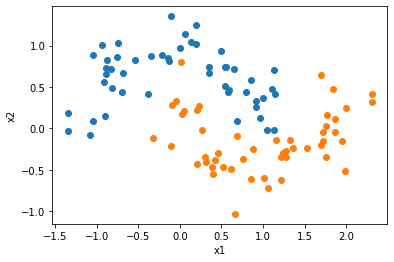

In [ ]:
# 가상의 데이터 셋 시각화
plt.scatter(X[y == 0, 0], X[y == 0, 1])  # 클래스가 0인 샘플들
plt.scatter(X[y == 1, 0], X[y == 1, 1])  # 클래스가 1인 샘플들
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# 다차항을 추가한 LinearSVC 생성
model = Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),  # 다차항 특성 추가
                        ('scaler', StandardScaler()),            # 특성 스케일
                        ('clf', LinearSVC(random_state=1))])     # ML 알고리즘

In [ ]:
# 모델 훈련
model.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=1,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
def plot_decision_boundary(estimator, X, y):
    # 데이터 시각화
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='+')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='^')

    # LinearSVC가 찾은 경계면을 시각화 
    X1, X2 = np.meshgrid(np.arange(-1.5, 2.5, 0.001), np.arange(-1.0, 1.5, 0.001))
    Xs = np.c_[X1.ravel(), X2.ravel()]
    ys = estimator.predict(Xs).reshape(X1.shape)
    plt.contourf(X1, X2, ys, cmap=plt.cm.brg, alpha=0.2)

    plt.grid()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

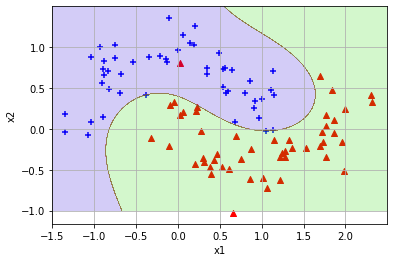

In [ ]:
plot_decision_boundary(model, X, y)



---

`numpy.meshgrid`

In [ ]:
X1, X2 = np.meshgrid([1, 2, 3, 4], [-1, 0, 1])

In [ ]:
X1

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [ ]:
X2

array([[-1, -1, -1, -1],
       [ 0,  0,  0,  0],
       [ 1,  1,  1,  1]])

In [ ]:
X1.ravel()

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [ ]:
X2.ravel()

array([-1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1,  1])

In [ ]:
np.c_[X1.ravel(), X2.ravel()]

array([[ 1, -1],
       [ 2, -1],
       [ 3, -1],
       [ 4, -1],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 1,  1],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1]])



---



## Polynomial 커널을 사용하는 SVC

In [ ]:
# polynoimal 커널 트릭(kernel trick)을 사용하는 SVM 분류기 모델 생성
model2 = Pipeline(steps=[('scaler', StandardScaler()),
                         ('clf', SVC(kernel='poly', degree=3, coef0=1.0, C=10, random_state=1))])

SVC: 커널 트릭을 사용하는 SVM 분류기

kernel='poly' 설정했을 때 함께 설정하는 파라미터:
* degree: 다차항을 추가하는 차수
* coef0: 고차항의 중요도
    * coef0의 값이 작을 수록, 고차항의 중요도는 작아짐. ---> 선형 SVM에 비슷해짐.
    * coef0의 값이 클 수록, 고차항의 중요도가 커짐. ---> 데이터 셋에 overfitting되어 감.

In [ ]:
# 모델 훈련
model2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

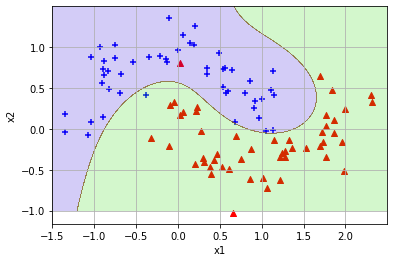

In [ ]:
plot_decision_boundary(model2, X, y)

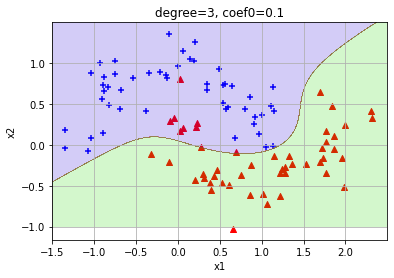

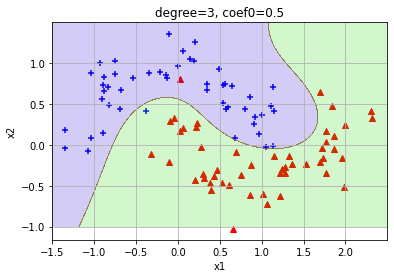

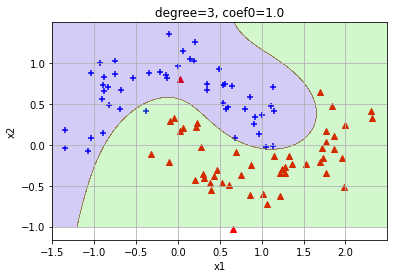

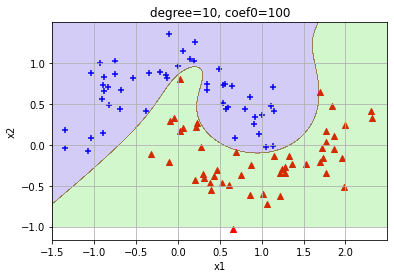

In [ ]:
degrees_coefs = [(3, 0.1), (3, 0.5), (3, 1.0), (10, 100)]
for d, c in degrees_coefs:
    estimator = Pipeline([('scaler', StandardScaler()),
                          ('clf', SVC(kernel='poly', degree=d, coef0=c, C=10, random_state=1))])
    estimator.fit(X, y)
    plt.title(f'degree={d}, coef0={c}')
    plot_decision_boundary(estimator, X, y)

## Gaussian RBF(Radial Basis Function, 방사 기저 함수) 커널 SVC

In [ ]:
# Gaussian RBF 커널 트릭을 사용하는 SVC 생성
model3 = SVC(kernel='rbf', gamma=0.1, C=0.1)

In [ ]:
model3.fit(X, y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

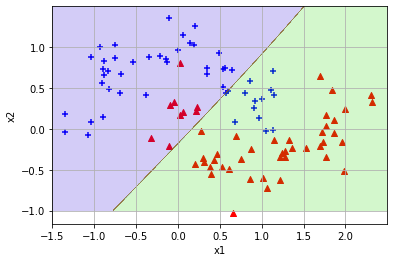

In [ ]:
plot_decision_boundary(model3, X, y)

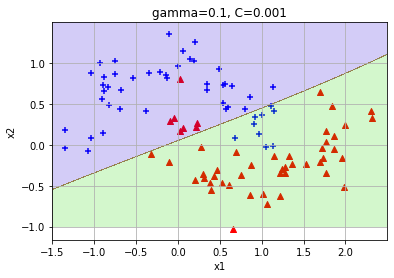

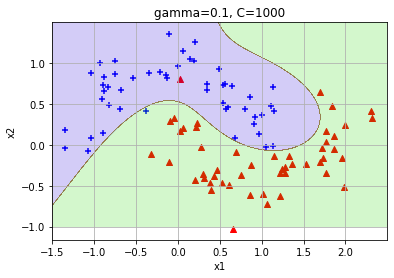

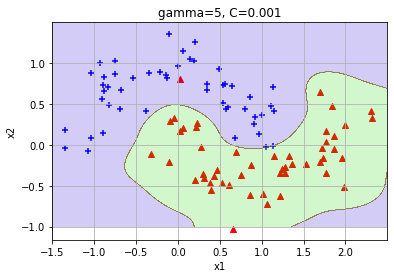

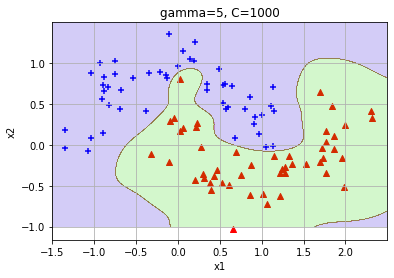

In [ ]:
gammas_cs = [(0.1, 0.001), (0.1, 1000), (5, 0.001), (5, 1000)]
for g, c in gammas_cs:
    estimator = Pipeline([('scaler', StandardScaler()),
                          ('clf', SVC(kernel='rbf', gamma=g, C=c, random_state=1))])
    estimator.fit(X, y)
    plt.title(f'gamma={g}, C={c}')
    plot_decision_boundary(estimator, X, y)

kernel='rbf'로 설정했을 때 함께 설정하는 파라미터:
* gamma
    * gamma 값이 클 수록, overfitting이 심해짐.
    * gamma 값이 작을 수록, 곡선이 더 평평해짐. overfitting이 줄어듦.

kernel='rbf', 또는 kernel='poly' 일 때 설정하는 파라미터:
* C: 규제 크기(alpha)의 역수
    * C값이 클 수록, overfitting이 심해짐.
    * C값이 작을 수록, overfitting이 줄어듦.

# SVM Regression

In [ ]:
# 회귀 문제에서 사용할 가상의 데이터 셋
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1  # (100, 1) shape의 2d array
y = 0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(100, 1) / 10  # (100, 1) shape의 2d array
y = y.ravel()  # (100, 1) 2d ---> (100,) 1d

In [ ]:
X.shape, y.shape

((100, 1), (100,))

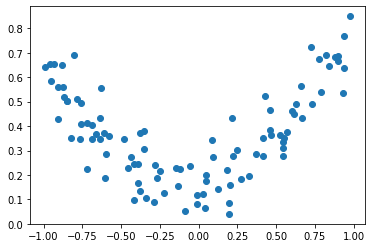

In [ ]:
# 가상의 데이터 셋을 시각화
plt.scatter(X, y)
plt.show()

## Polynoimal kernel SVR

In [ ]:
# 모델 생성
reg_model1 = SVR(kernel='poly', degree=2)

In [ ]:
# 모델 훈련
reg_model1.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# 모델 훈련 결과 시각화
def plot_regression_line(estimator, X, y):
    plt.scatter(X, y, c='darkgray')

    # SVR이 찾은 곡선을 시각화
    Xs = np.arange(-1, 1, 0.001).reshape((-1, 1))
    ys = estimator.predict(Xs)
    plt.plot(Xs, ys, 'r-')

    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

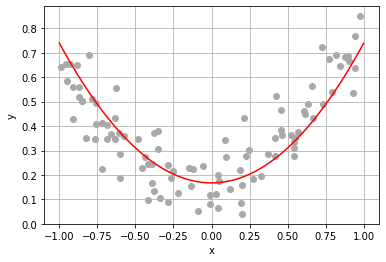

In [ ]:
plot_regression_line(reg_model1, X, y)

## Gaussian RBF kernel SVR

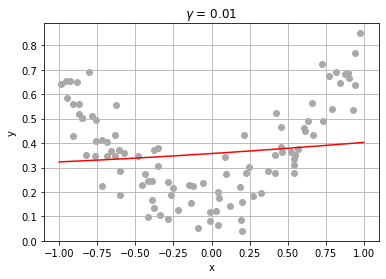

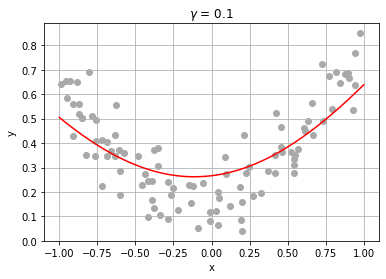

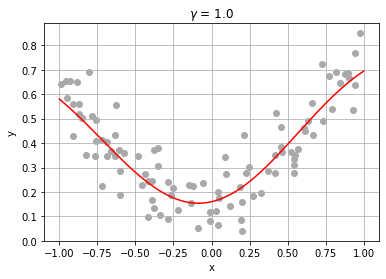

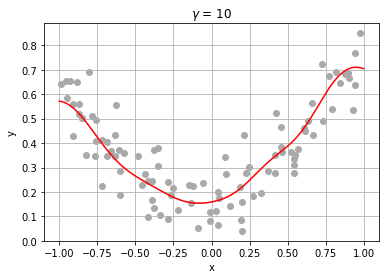

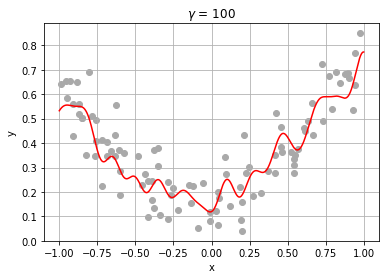

In [ ]:
gammas = [0.01, 0.1, 1.0, 10, 100]
for g in gammas:
    estimator = SVR(kernel='rbf', gamma=g)
    estimator.fit(X, y)
    plt.title(f'$\gamma$ = {g}')
    plot_regression_line(estimator, X, y)